# First Steps

Now that you have installed Marvin, it's time to take your first steps.  If you want to learn more about how Marvin works, then go see [General Info](https://api.sdss.org/doc/manga/marvin/refactor/general.html) to learn about Marvin Modes, Versions, or Downloading.  If you just want to play, then read on.

First let's run some boilerplate code for Python 2/3 compatibility and plotting in the notebook:

In [1]:
from __future__ import print_function, division, absolute_import
import matplotlib.pyplot as plt
%matplotlib inline

Now, let’s import Marvin:

In [2]:
import marvin

INFO: No release version set. Setting default to MPL-5


Let's see what release we're using.  Releases can be either MPLs (e.g. MPL-5) or DRs (e.g. DR13), however DRs are currently disabled in Marvin.

In [3]:
marvin.config.release

'MPL-5'

On intial import, Marvin will set the default data release to use the latest MPL available, currently MPL-5. You can change the version of MaNGA data using the Marvin [Config](https://api.sdss.org/doc/manga/marvin/refactor/api/general.html#marvin-config-class).



In [7]:
from marvin import config
config.setRelease('MPL-3')

print('MPL:', config.release)

MPL: MPL-3


You can also specifically change releases using the setMPL method as well:

In [10]:
config.setMPL('MPL-5')
print('MPL:', config.release)

MPL: MPL-5


But let's work with MPL-4:

In [11]:
config.setRelease('MPL-4')

# check designated version
config.release

'MPL-4'

# My First Cube
Now let’s play with a Marvin Cube!

Import the Marvin-Tools Cube class:

In [12]:
from marvin.tools.cube import Cube

Let's load a cube from a local file. Start by specifying the full path and name of the file, such as:

`/Users/Brian/Work/Manga/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz`

**EDIT Next Cell**

In [13]:
#----- EDIT THIS CELL -----#

# filename = '/Users/Brian/Work/Manga/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'
filename = 'path/to/manga/cube/manga-8485-1901-LOGCUBE.fits.gz'

filename = '/Users/andrews/manga/spectro/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'
filename = '/Users/Brian/Work/Manga/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'

Create a Cube object:

In [14]:
cc = Cube(filename=filename)

a string value was expected. [astropy.wcs.wcs]


Now we have a Cube object:

In [15]:
print(cc)

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>


How about we look at some meta-data

In [16]:
cc.ra, cc.dec, cc.header['SRVYMODE']

(232.544703894, 48.6902009334, 'MaNGA dither')

...and the quality and target bits

In [17]:
cc.targetbit

{'bits': [2336L], 'names': ['MNGTRG1']}

In [18]:
cc.qualitybit

('DRP3QUAL', 1L, None)

## Get a Spaxel
Cubes have several functions currently available: getSpaxel, getMaps, getAperture.  Let's look at spaxels. We can retrieve spaxels from a cube easily via indexing. In this manner, spaxels are 0-indexed from the lower left corner. Let's get spaxel (x=10, y=10):

In [34]:
spax = cc[10,10]

In [36]:
# print the spaxel to see the x,y coord from the lower left, and the coords relative to the cube center, x_cen/y_cen
spax

<Marvin Spaxel (x=10, y=10; x_cen=-7, y_cen=-7>

Spaxels have a spectrum associated with it.  It has the wavelengths and fluxes of each spectral channel:

Alternatively grab a spaxel with getSpaxel.  Use the xyorig keyword to set the coordinate origin point: 'lower' or 'center'.  The default is "center"

In [41]:
# let's grab the central spaxel
spax = cc.getSpaxel(x=0, y=0)
spax

<Marvin Spaxel (x=17, y=17; x_cen=0, y_cen=0>

In [42]:
spax.spectrum.wavelength

array([  3621.59598486,   3622.42998417,   3623.26417553, ...,
        10349.03843826,  10351.42166679,  10353.80544415])

In [43]:
spax.spectrum.flux

array([ 0.4740223 ,  0.41714188,  0.47762075, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)


### Plot the spectrum!

In [44]:
# turn on interactive plotting
%matplotlib notebook

<IPython.core.display.Javascript object>


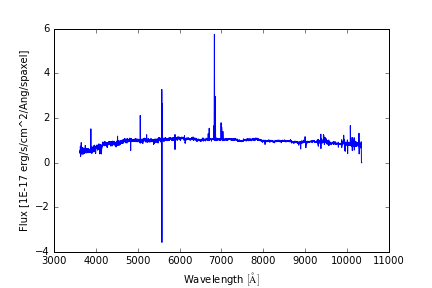

In [45]:
spax.spectrum.plot()

Save plot to Downloads directory:

<IPython.core.display.Javascript object>


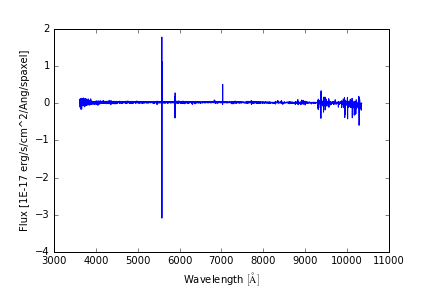

In [30]:
# To save the plot, we need to draw it in the same cell as the save command.
spax.spectrum.plot()

import os
plt.savefig(os.getenv('HOME') + '/Downloads/my-first-spectrum.png')

# NOTE - if you are using the latest version of iPython and Jupyter notebooks, then interactive matplotlib plots 
# should be enabled.  You can save the figure with the save icon in the interactive toolbar.